In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting histogram
import seaborn as sns 


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#loading training and testing data

training = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#look at the data types to gain better understanding of the data
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


the cabin and age have many missing values

In [5]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The next step was to visualize the data. I divided the features into categorical and numerical data, so that, it is easier to plot them.

In [6]:
Titanic_categorical_features = training[['Pclass', 'Sex', 'Embarked' , 'Cabin','Ticket', 'Survived']]
Titanic_numerical_features=training[['Age', 'SibSp','Parch','Fare']]

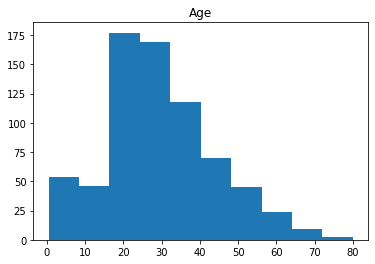

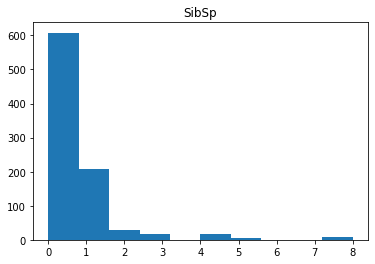

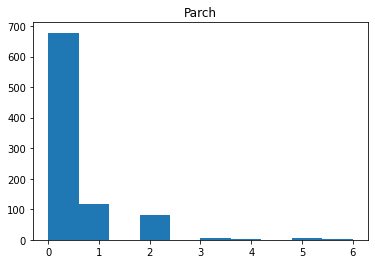

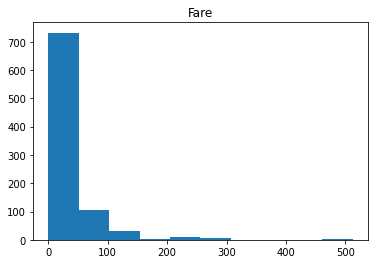

In [7]:
Titanic_numerical_features.columns
for i in Titanic_numerical_features.columns:
    plt.hist(Titanic_numerical_features[i])
    plt.title(i)
    plt.show()

Age is the only feature with normal distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


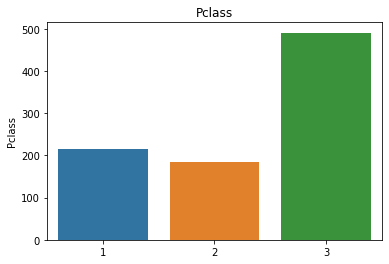

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


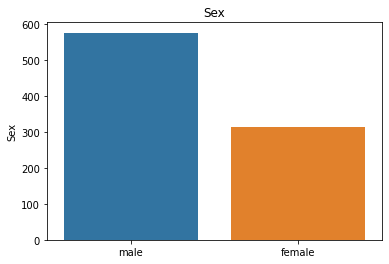

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


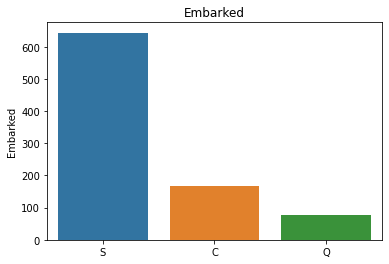

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


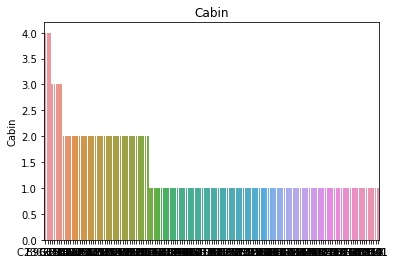

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


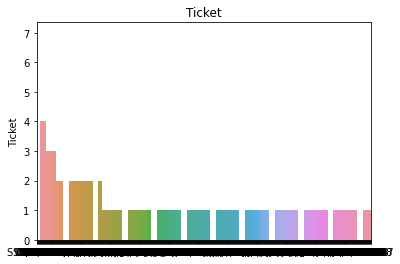

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


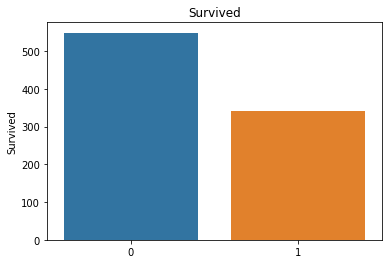

In [8]:
for i in Titanic_categorical_features.columns:
    sns.barplot(Titanic_categorical_features[i].value_counts().index,Titanic_categorical_features[i].value_counts()).set_title(i)
    plt.show()

In [9]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking if other columns contain any null values

Cabin is a categorical feature with many missing attributes tryying to fill them would lower the data quality. Fill the missing age values with the mean. The two missing embarked values would not effect the training therefore they were removed

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
training = training.dropna(axis=0, subset=['Embarked'])

In [12]:
from sklearn.impute import SimpleImputer
training.Age = training.Age.fillna(training.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())

In [13]:
y = training.Survived

In [14]:
from sklearn.preprocessing import LabelEncoder
Titanic_features = ['Pclass', 'Sex', 'Age',  'Fare',  'Embarked']

training = pd.get_dummies(training[Titanic_features])
xtt = pd.get_dummies(test[Titanic_features])

In [15]:
Titanic_features = ['Pclass', 'Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Age','Fare']
X = training[Titanic_features]
x_tt2 = xtt[Titanic_features]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [17]:
from sklearn import svm

clf = svm.SVC(kernel='linear', random_state =42)
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)




In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred_NB= model.predict(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators=100,random_state =42)
random_forest_model.fit(X_train,y_train)
y_pred_RF=random_forest_model.predict(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000,random_state =42)
logreg.fit(X_train,y_train)
y_pred_LR=logreg.predict(X_test)

In [21]:
from sklearn import metrics
print(" SVM Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print(" NB Accuracy:",metrics.accuracy_score(y_test, y_pred_NB))
print(" Random forest Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))
print(" Linear Regressor Accuracy:",metrics.accuracy_score(y_test, y_pred_LR))

 SVM Accuracy: 0.7303370786516854
 NB Accuracy: 0.7303370786516854
 Random forest Accuracy: 0.7584269662921348
 Linear Regressor Accuracy: 0.7415730337078652


In [22]:
from sklearn.model_selection import cross_val_score
svm_score = cross_val_score(clf, X, y, cv=5)
random_forest_score = cross_val_score(random_forest_model, X, y, cv=5)
linear_regressor_score = cross_val_score(logreg, X, y, cv=5)
bayes_score = cross_val_score(model, X, y, cv=5)

    

In [23]:
print(" SVM validation:",svm_score)
print(" NB Accuracy:",bayes_score)
print(" Random forest Accuracy:",random_forest_score)
print(" Linear Regressor Accuracy:" ,linear_regressor_score)

 SVM validation: [0.80337079 0.80337079 0.78651685 0.75280899 0.78531073]
 NB Accuracy: [0.75842697 0.79213483 0.7752809  0.76404494 0.79096045]
 Random forest Accuracy: [0.80337079 0.80337079 0.84269663 0.78089888 0.82485876]
 Linear Regressor Accuracy: [0.7752809  0.80898876 0.78089888 0.7752809  0.79096045]


Random_forest yields the best result among our models

In [24]:
prediction = clf.predict(x_tt2)
submission_cols = {'PassengerId' : test.PassengerId, 'Survived' : prediction}
submission = pd.DataFrame(data =submission_cols)
submission.to_csv('SVM_submission.csv', index =False)

prediction = model.predict(x_tt2)
submission_cols = {'PassengerId' : test.PassengerId, 'Survived' : prediction}
submission = pd.DataFrame(data =submission_cols)
submission.to_csv('NB_submission.csv', index =False)

prediction = random_forest_model.predict(x_tt2)
submission_cols = {'PassengerId' : test.PassengerId, 'Survived' : prediction}
submission = pd.DataFrame(data =submission_cols)
submission.to_csv('RF_submission.csv', index =False)
#test.isnull().sum()